In [6]:
import pandas as pd
from collections import Counter
from pathlib import Path
import os

Image_Grid = Path('../../data/processed/landscape_type_imagegrid')
# Read the two CSV files

for file_name in os.listdir(Image_Grid):
    file_path = Image_Grid / file_name
    if file_path.is_file():
        df_predictions = pd.read_csv(file_path)  # Contains image names, predicted classes, and probabilities
        
    # Extract the top 5 predicted classes, assuming every two columns are the class and the corresponding probability
    df_predictions['top5_predictions'] = df_predictions.apply(lambda row: tuple(row[4:13:2]), axis=1)  # Assuming every two columns are class and probability, extract the predicted classes
    
    # Count the most frequent prediction combinations and the total number of images in each score category
    most_common_predictions_by_category = {}
    total_images_by_category = {}
    
    prediction_combinations = df_predictions['top5_predictions']
    
    # Use Counter to count the most frequent prediction combinations
    most_common = Counter(prediction_combinations).most_common(1)[0]  # Return the most common prediction combination and its count
    
    # Output the total number of images and the most common prediction combination in each score category
    print(f"File name: {file_name}, Most Common Prediction: {most_common[0]}, Count: {most_common[1]}")


File name: selected_images_2_to_3.csv, Most Common Prediction: ('ski_resort', 'chalet', 'house', 'castle', 'oast_house'), Count: 1
File name: .ipynb_checkpoints, Most Common Prediction: ('ski_resort', 'chalet', 'house', 'castle', 'oast_house'), Count: 1
File name: selected_images_1_to_2.csv, Most Common Prediction: ('train_station/platform', 'subway_station/platform', 'escalator/indoor', 'railroad_track', 'airplane_cabin'), Count: 1
File name: selected_images_4_to_5.csv, Most Common Prediction: ('lake/natural', 'river', 'marsh', 'lagoon', 'swamp'), Count: 2
File name: selected_images_3_to_4.csv, Most Common Prediction: ('harbor', 'canal/urban', 'pier', 'slum', 'village'), Count: 1
File name: selected_images_5_to_6.csv, Most Common Prediction: ('mountain_snowy', 'mountain', 'glacier', 'valley', 'tundra'), Count: 3
File name: selected_images_6_to_7.csv, Most Common Prediction: ('tundra', 'mountain_path', 'mountain', 'valley', 'mountain_snowy'), Count: 9


In [19]:
import pandas as pd
from collections import Counter
import re
import pandas as pd
from collections import Counter
from pathlib import Path
import os

Image_Grid = Path('../../data/processed/landscape_type_imagegrid')
# Read the two CSV files
top5_common_classes_by_category = {}
for file_name in sorted(os.listdir(Image_Grid)):
    file_path = Image_Grid / file_name

    if file_path.is_file():
        df_predictions = pd.read_csv(file_path)  # Contains image names, predicted classes, and probabilities
        match = re.search(r"(\d+)_to_(\d+)", file_name)
        if match:
            result = f"{match.group(1)}-{match.group(2)}"
            score_category = match.group(1)
        # Extract the top 5 predicted classes, assuming every two columns are the class and the corresponding probability
        df_predictions['top5_predictions'] = df_predictions.apply(lambda row: tuple(row[4:13:2]), axis=1)  # Assuming every two columns are class and probability, extract the predicted classes
        
        # Count the most frequent prediction combinations and the total number of images in each score category
        most_common_predictions_by_category = {}
        total_images_by_category = {}
        
        all_predictions = [cls for sublist in df_predictions['top5_predictions'] for cls in sublist]
        
        # Use Counter to count the most frequent prediction combinations
        most_common_classes = Counter(all_predictions).most_common(5)  # Return the most common prediction combination and its count
        total_images_by_category = len(df_predictions)
        top5_common_classes_by_category[score_category] = most_common_classes
        # Output the total number of images and the most common prediction combination in each score category
        print(f"Score category: {result}: Total Images: {total_images_by_category}")
        for landscape_class, count in most_common_classes:
            print(f"    Landscape Class: {landscape_class}, Count: {count}")
data = []
for category, most_common_classes in top5_common_classes_by_category.items():
    for landscape_class, count in most_common_classes:
        data.append([category, landscape_class, count])

df = pd.DataFrame(data, columns=['Score Class', 'Landscape Category', 'Count'])

Score category: 1-2: Total Images: 500
    Landscape Class: industrial_area, Count: 128
    Landscape Class: hospital, Count: 120
    Landscape Class: parking_lot, Count: 94
    Landscape Class: motel, Count: 86
    Landscape Class: highway, Count: 83
Score category: 2-3: Total Images: 500
    Landscape Class: house, Count: 82
    Landscape Class: building_facade, Count: 65
    Landscape Class: motel, Count: 62
    Landscape Class: inn/outdoor, Count: 58
    Landscape Class: industrial_area, Count: 54
Score category: 3-4: Total Images: 500
    Landscape Class: tree_farm, Count: 66
    Landscape Class: church/outdoor, Count: 64
    Landscape Class: tower, Count: 58
    Landscape Class: forest/broadleaf, Count: 57
    Landscape Class: pasture, Count: 54
Score category: 4-5: Total Images: 500
    Landscape Class: valley, Count: 115
    Landscape Class: tundra, Count: 105
    Landscape Class: mountain, Count: 89
    Landscape Class: river, Count: 86
    Landscape Class: cliff, Count: 66
Sc

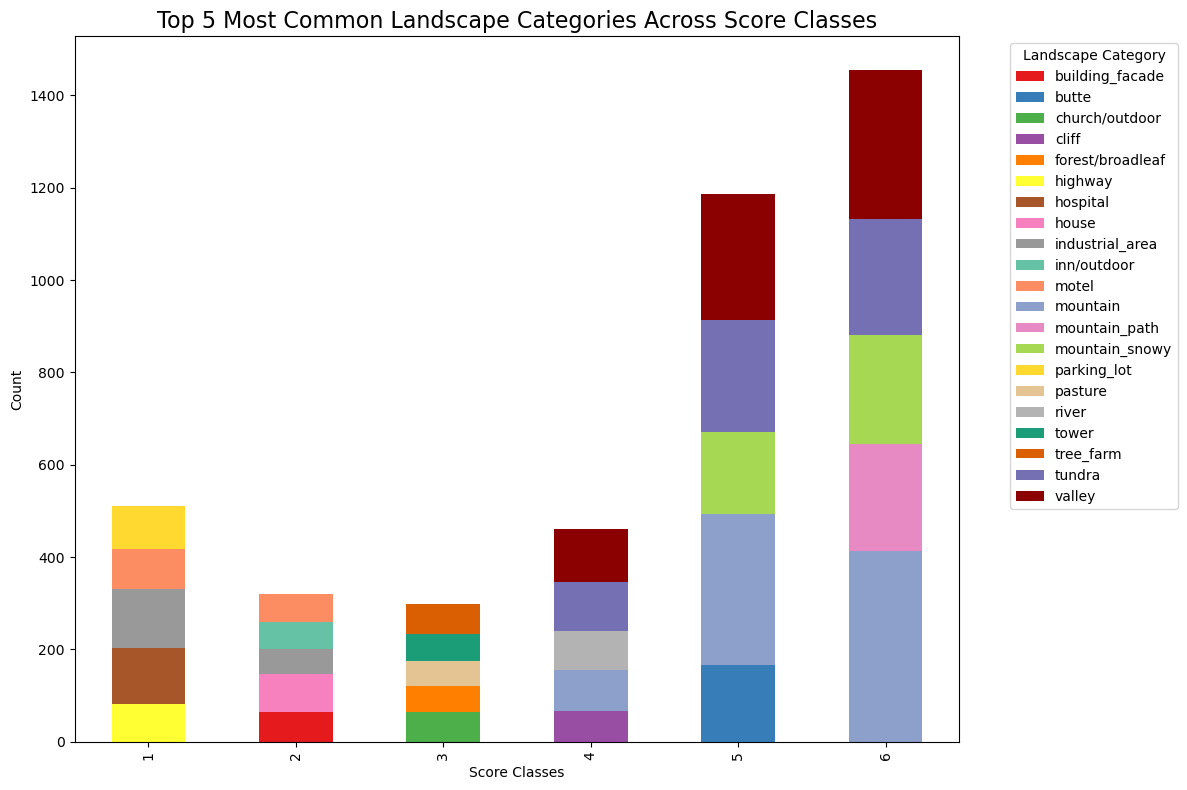

In [22]:
import matplotlib.pyplot as plt

high_contrast_colors = [
    '#E41A1C', '#377EB8', '#4DAF4A', '#984EA3', '#FF7F00', 
    '#FFFF33', '#A65628', '#F781BF', '#999999', '#66C2A5', 
    '#FC8D62', '#8DA0CB', '#E78AC3', '#A6D854', '#FFD92F', 
    '#E5C494', '#B3B3B3', '#1B9E77', '#D95F02', '#7570B3',
    '#8B0000', '#4682B4', '#32CD32', '#9400D3', '#FFA500',
    '#FF1493', '#FFD700', '#20B2AA', '#FF6347', '#7B68EE'
]
pivot_df = df.pivot(index='Score Class', columns='Landscape Category', values='Count').fillna(0)
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8), color=high_contrast_colors)

plt.title('Top 5 Most Common Landscape Categories Across Score Classes', fontsize=16)
plt.xlabel('Score Classes')
plt.ylabel('Count')
plt.legend(title='Landscape Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# plt.savefig("/home/ubuntu/landscape-aesthetics/reports/figures/common_landscape_classes_Equal_Distribution.jpg")
plt.show()


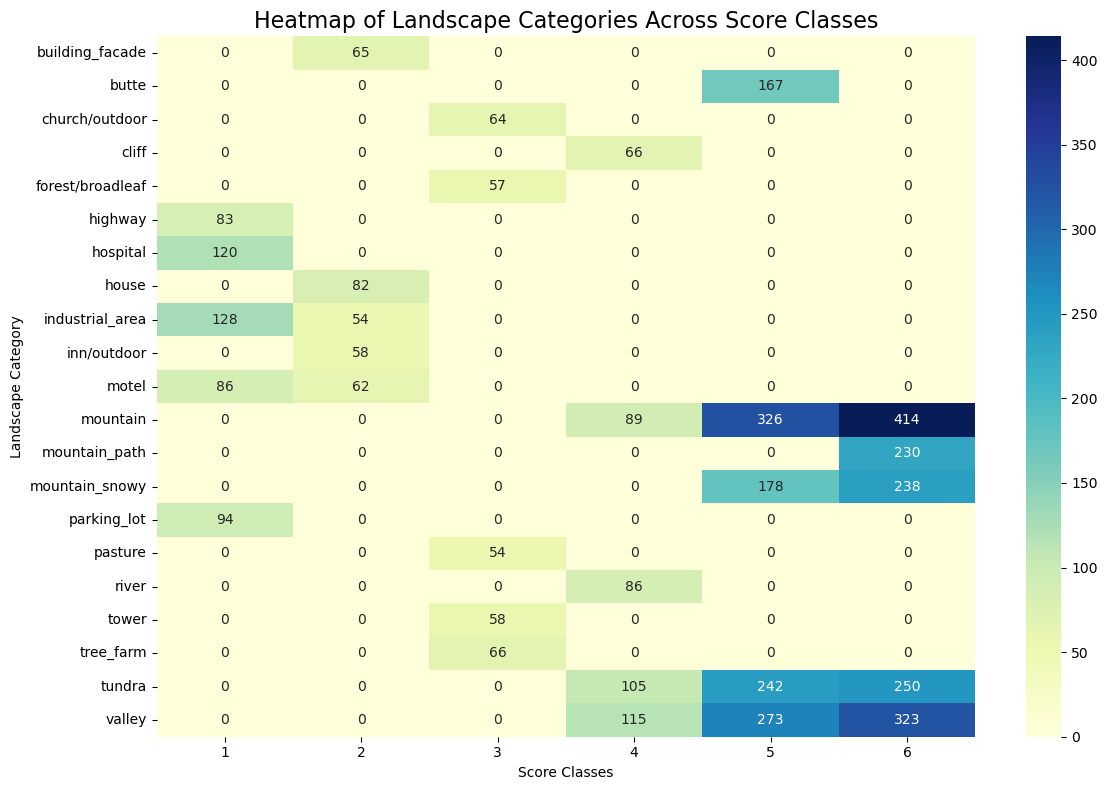

In [23]:
import seaborn as sns
# Prepare the data for the heatmap
heatmap_data = df.pivot(index='Landscape Category', columns='Score Class', values='Count').fillna(0)

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="g")

# Add title and labels
plt.title('Heatmap of Landscape Categories Across Score Classes', fontsize=16)
plt.xlabel('Score Classes')
plt.ylabel('Landscape Category')
plt.tight_layout()

# Show the plot
plt.savefig("/home/ubuntu/landscape-aesthetics/reports/figures/common_landscape_classes_equal_distribution_heatmap.jpg")
plt.show()


In [24]:
file_path = '../../data/processed/wikimedia_commons/clean/ns6_clean_00.parquet'
df = pd.read_parquet(file_path)

print("column：", df.columns.tolist())

column： ['ns', 'missing', 'known', 'imagerepository', 'ns6_normalized_title', 'ns6_unnormalized_title', 'date_time', 'object_name', 'commons_metadata_extension', 'categories', 'assessments', 'gps_latitude', 'gps_longitude', 'gps_map_datum', 'image_description', 'credit', 'artist', 'license_short_name', 'usage_terms', 'attribution_required', 'license_url', 'copyrighted', 'restrictions', 'license', 'url', 'image_width', 'image_height', 'mediatype', 'explicit_content', 'metadata_path', 'image_path', 'date_time_original', 'permission', 'attribution', 'query_id', 'country', 'pageid', 'author_count', 'badfile']
